# 数据增强
1、数据增强是深度学习中计算机图像分析的标配，实际工作中数据集有限，需要通过对图像的反转、旋转、镜像、高斯白噪声等技巧实现数据增强。

2、在keras中，有响应的API接口ImageDataGenerator做数据增强，在pytorch中，transforms中包含了一些数据增强的方法，有裁剪（Crop）、翻转(Flip)、旋转(Rotation)、变换大小(Resize)、标准化(Normalize)、改变亮度对比度饱和度（ColorJitter）,彩色转为灰度图(Grayscale)、线性变换(LinearTransformation)等，也可以将这些操作组合起来，做随机组合进行的数据增强。

3、另外，imgaug也是用于深度学习中常用的图像增强的库。

In [7]:
# torchvision
import PIL.Image as Image
import matplotlib.pyplot as plt
from torchvision import transforms as transforms

In [8]:
path = r'F:\books_projects\projects_2020\datawhale\alidata\mchar_train'
img = Image.open(path + '\\' + '000000.png')

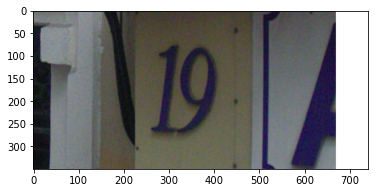

In [11]:
plt.imshow(img)

(400, 200)


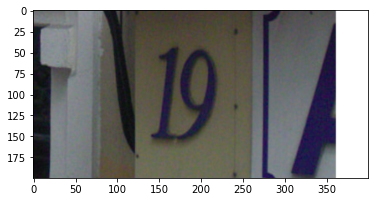

In [12]:
#随机比例缩放
new_img = transforms.Resize((200,400))(img)
plt.imshow(new_img)
print(new_img.size)

(100, 100)


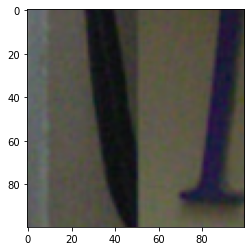

In [16]:
#随机比例裁剪
new_img2 = transforms.RandomCrop(100)(new_img)
plt.imshow(new_img2)
print(new_img2.size)

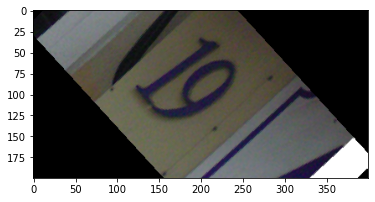

In [17]:
#随机水平旋转
new_img3 = transforms.RandomRotation(90)(new_img)
plt.imshow(new_img3)


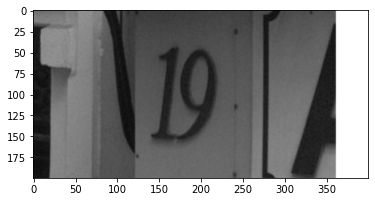

In [18]:
#随机灰度化
new_img4 = transforms.RandomGrayscale(p=0.6)(new_img)
plt.imshow(new_img4)

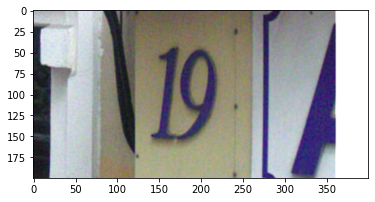

In [21]:
#
new_img5 = transforms.ColorJitter(brightness=1)(new_img)
plt.imshow(new_img5)

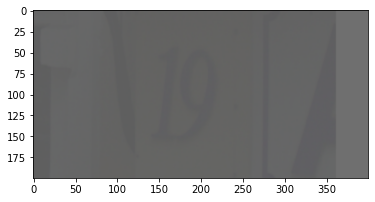

In [22]:
new_img6 = transforms.ColorJitter(contrast=1)(new_img)
plt.imshow(new_img6)

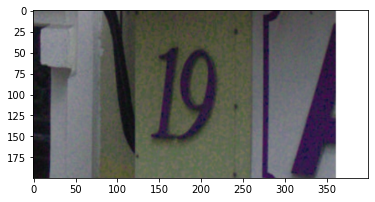

In [24]:
new_img7 = transforms.ColorJitter(hue=0.5)(new_img)
plt.imshow(new_img7)

In [42]:
#使用多种变换方式，组成一个PipeLine。创建一个transforms数组，
transform = transforms.Compose([
    transforms.RandomSizedCrop(100),
    transforms.RandomHorizontalFlip()
])

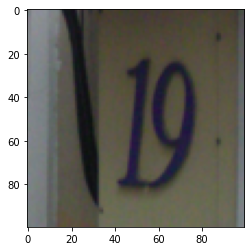

In [43]:
img00 = transform.transforms[0](new_img)
plt.imshow(img00)

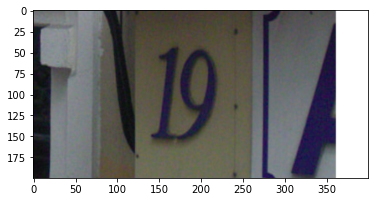

In [44]:
import time
trans = transform.transforms
'''
i = trans[0]
img00 = i(new_img)
plt.imshow(img00)
time.sleep(1)
i = trans[1]
img00 = i(new_img)
plt.imshow(img00)
'''
for i in trans:
    img00 = i(new_img)
    plt.imshow(img00)
    time.sleep(1)
 